In [ ]:
#The idea is to follow this process with more data


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [23]:
import chart_studio.plotly as py
import cufflinks as cf  #all Pandas data frames and series objects have a new method attached to them called .iplot() which has a similar API to Pandas' built-in .plot() method.
from lifelines import KaplanMeierFitter

cf.go_offline()

In [2]:
#loading data for survival analysis of conserved natural areas..
df_conservation= pd.read_csv('/Users/enrique/Documents/Ironhack/datamex0320/proyecto-final/ml-foliar-tree-disease/conservacion_manejo_superficie.csv')
df_forest_extension= pd.read_csv('/Users/enrique/Documents/Ironhack/datamex0320/proyecto-final/ml-foliar-tree-disease/extension_bosques_y_selvas.csv')

In [5]:
df_forest_extension.shape
df_conservation.shape

(126, 3)

In [25]:
df_forest_extension.head(15)

,AÑO,VEGETACION_FORESTAL,EXTENSION_(HECTAREAS)
0,1976,Bosques,35062148
1,1993,Bosques,34525283
2,2002,Bosques,34166446
3,2007,Bosques,34142463
4,2011,Bosques,34274101
5,2014,Bosques,34240266
6,1976,Selvas,35772298
7,1993,Selvas,34264490
8,2002,Selvas,32937296
9,2007,Selvas,32101988


In [37]:
#renaming  columns for practicity 
df_conservation= df_conservation.rename(columns={"AÑO": "año", "PROGRAMA": "programa", "SUPERFICIE_ACUMULADA_(HECTAREAS)": "superficie_acumulada"})

In [46]:
# cheking if there are any null values: no, there aren`t, so no need to check fill them or remove`em
df_conservation[df_conservation.isnull().any(axis=1)]

,año,programa,superficie_acumulada


In [47]:
df_conservation

,año,programa,superficie_acumulada
0,2000,PSA,0.0
1,2001,PSA,0.0
2,2002,PSA,0.0
3,2003,PSA,126818.0
4,2004,PSA,342627.0
...,...,...,...
121,2013,UMA,33658065.0
122,2014,UMA,33867324.0
123,2015,UMA,34244654.0
124,2016,UMA,34477629.0


In [48]:
#and now the other df:
df_forest_extension[df_forest_extension.isnull().any(axis=1)]

,AÑO,VEGETACION_FORESTAL,EXTENSION_(HECTAREAS)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1bff1650>,
      dtype=object)

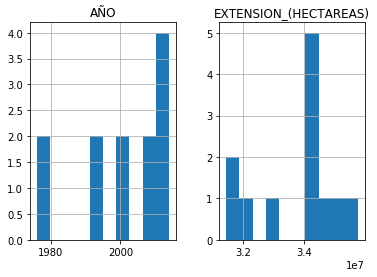

In [49]:
df_forest_extension.hist()

In [51]:
df_forplot = pd.DataFrame(np.random.randn(1000, 2), columns=['VEGETACION_FORESTAL', 'EXTENSION_(HECTAREAS)'])
fig = df_forest_extension.iplot(asFigure=True, xTitle="The X Axis",
                    yTitle="The Y Axis", title="The Figure Title")
fig.show()

In [15]:
df_conservation.head()

,AÑO,PROGRAMA,SUPERFICIE_ACUMULADA_(HECTAREAS)
0,2000,PSA,0.0
1,2001,PSA,0.0
2,2002,PSA,0.0
3,2003,PSA,126818.0
4,2004,PSA,342627.0


In [12]:
print(df_forest_extension.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
AÑO                      12 non-null int64
VEGETACION_FORESTAL      12 non-null object
EXTENSION_(HECTAREAS)    12 non-null int64
dtypes: int64(2), object(1)
memory usage: 416.0+ bytes
None


In [9]:
print(df_conservation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
AÑO                                 126 non-null int64
PROGRAMA                            126 non-null object
SUPERFICIE_ACUMULADA_(HECTAREAS)    126 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ KB
None


In [11]:
#This gives us the name of the programs under protection nature conservation
df_conservation['PROGRAMA'].unique().tolist()

['PSA',
 'PROCYMAF',
 'RAMSAR',
 'PRODEFOR',
 'ANP terrestres',
 'ANP marinas',
 'UMA']

So we see from the data exploration that the info in case of the Forest Extension can already gives us some insights for the suurvival analysis, later we will see for the conservation dataframe. 

In [ ]:
#from ideas on https://github.com/YonatanRA/clases_datamex0320/blob/master/soluciones%20modulo%202/lab-survival-analysis/your-code/main.ipynb
#If the lines have gaps in them, you can fill them using the fillna(method=ffill) and the fillna(method=bfill) methods and then taking the average.

In [17]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [54]:
conv_nums = {"PROGRAMA": {'PSA': 0,
                          'PROCYMAF':1,
                          'RAMSAR':2,
                          'PRODEFOR':3,
                          'ANP terrestres':4,
                          'ANP marinas':5,
                          'UMA':6} }

In [59]:
pd_Conservation = df_conservation.copy()
pd_Conservation.head()

,año,programa,superficie_acumulada
0,2000,PSA,0.0
1,2001,PSA,0.0
2,2002,PSA,0.0
3,2003,PSA,126818.0
4,2004,PSA,342627.0


In [60]:

df_Conservation.replace(cleanup_nums, inplace=True)
df_Conservation.head()

NameError: name 'df_Conservation' is not defined

In [24]:
rates = survival(df_forest_extension, 'EXTENSION_(HECTAREAS)', 'AÑO', 'VEGETACION_FORESTAL')[1:] 
# Se quita el primer valor que es 0 años y no tiene sentido, así empieza a partir de 18 años.

rates.iplot(kind='line', xTitle='Anio', yTitle='Vegetation Retention Rates', 
            title='Vegetation Retention Rates or Attrition by Gender (extension) and Age -(ano)')

/Users/enrique/opt/anaconda3/lib/python3.7/site-packages/lifelines/utils/__init__.py:1177: UserWarning:

Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.



TypeError: Wrong dtype 'object'.

In [35]:
df_conservation.head(20)

,AÑO,PROGRAMA,SUPERFICIE_ACUMULADA_(HECTAREAS)
0,2000,PSA,0.00
1,2001,PSA,0.00
2,2002,PSA,0.00
3,2003,PSA,126818.00
4,2004,PSA,342627.00
5,2005,PSA,538647.00
6,2006,PSA,684540.00
7,2007,PSA,1294951.00
8,2008,PSA,1752428.22
9,2009,PSA,2251957.91


In [29]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit']=2**128

In [ ]:
'''df=pd.read_csv('https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations',
               usecols=['name', 'group', 'year', 'value'])
df.head()'''
# group= programa, value= SUPERFICIE_ACUMULADA_(HECTAREAS), year= AÑO
df_conservation

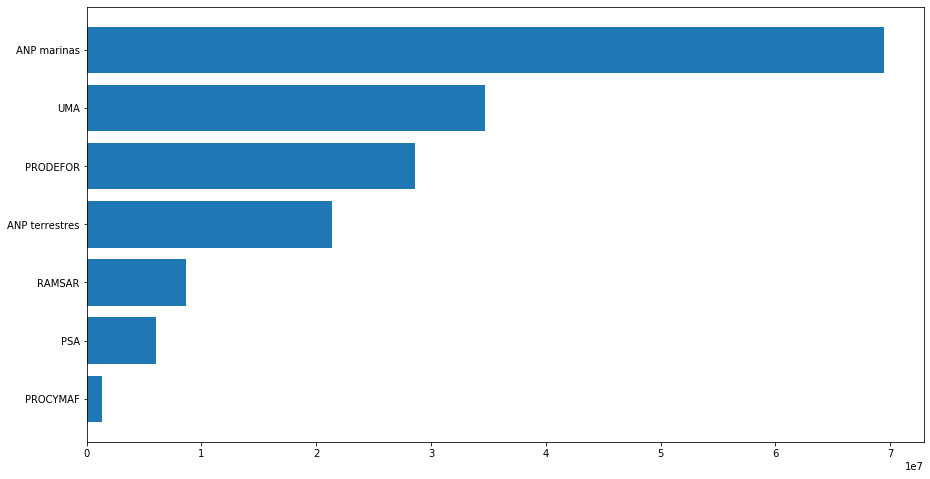

In [43]:
current_year=2017
dff=(df_conservation[df_conservation.año.eq(current_year)].sort_values(by='superficie_acumulada', ascending=True).head(10))

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.programa, dff.superficie_acumulada);

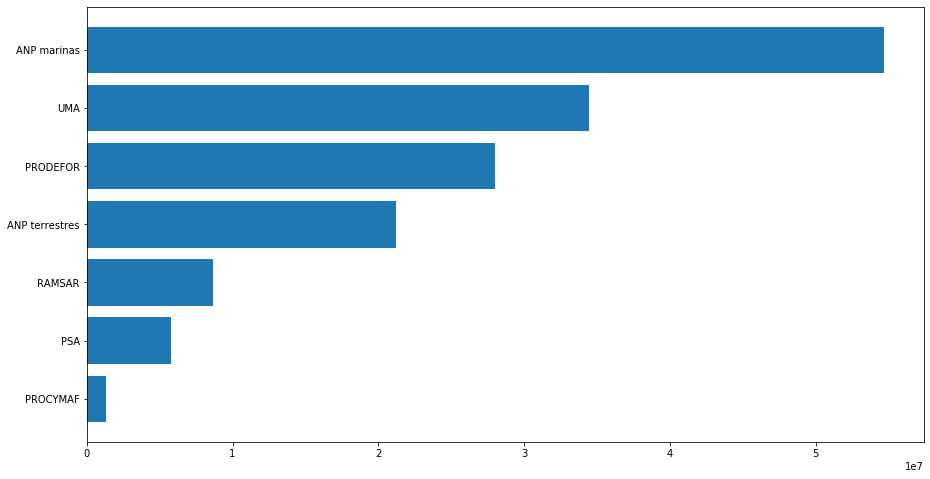

In [44]:
current_year=2016
dff=(df_conservation[df_conservation.año.eq(current_year)].sort_values(by='superficie_acumulada', ascending=True).head(10))

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.programa, dff.superficie_acumulada);

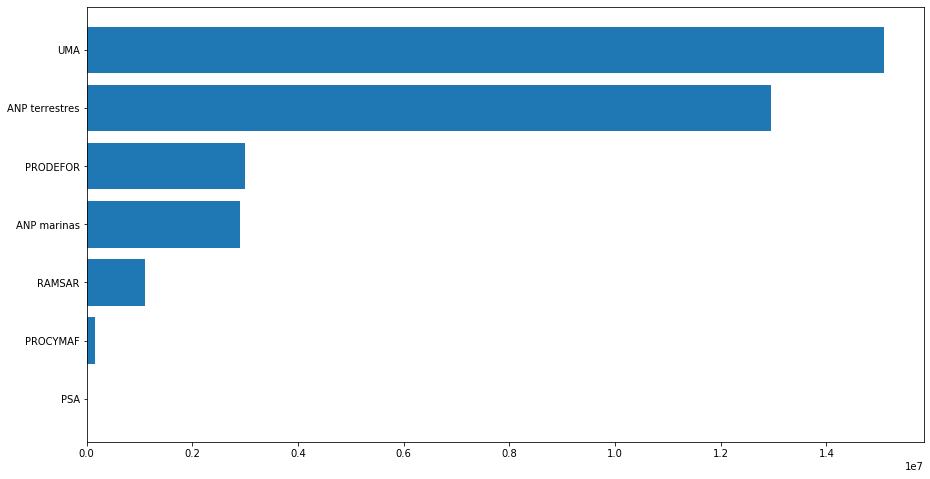

In [45]:
current_year=2000
dff=(df_conservation[df_conservation.año.eq(current_year)].sort_values(by='superficie_acumulada', ascending=True).head(10))

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.programa, dff.superficie_acumulada);

#Each year from 2000 until 2017 there where increases on the total ammount of protected areas. 